In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'ID': ['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08'],
    'Price': [4999, 799, 399, 99, 1299, 249, 699, 109],
    'Sales': [120, 85, 60, 300, 90, 150, 110, 270],
    'Stock': [15, 32, 8, 45, 20, 40, 22, 35],
    'Price_Diff': [100, 50, -21, 4, 200, -10, 30, 9],
    'Cat_Code': [1, 2, 3, 4, 2, 4, 2, 4]
}

df = pd.DataFrame(data)

X = df[['Sales', 'Stock', 'Price_Diff', 'Cat_Code']]
y = df['Price']

model = DecisionTreeRegressor()
model.fit(X, y)

df['Predicted_Price'] = model.predict(X)
df


,ID,Price,Sales,Stock,Price_Diff,Cat_Code,Predicted_Price
0,P01,4999,120,15,100,1,4999.0
1,P02,799,85,32,50,2,799.0
2,P03,399,60,8,-21,3,399.0
3,P04,99,300,45,4,4,99.0
4,P05,1299,90,20,200,2,1299.0
5,P06,249,150,40,-10,4,249.0
6,P07,699,110,22,30,2,699.0
7,P08,109,270,35,9,4,109.0


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(model)

DecisionTreeRegressor()


In [6]:

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)


MAE: 1516.6666666666667
MSE: 6174166.666666667
RMSE: 2484.787046542755
MAPE: 0.5292460395060149


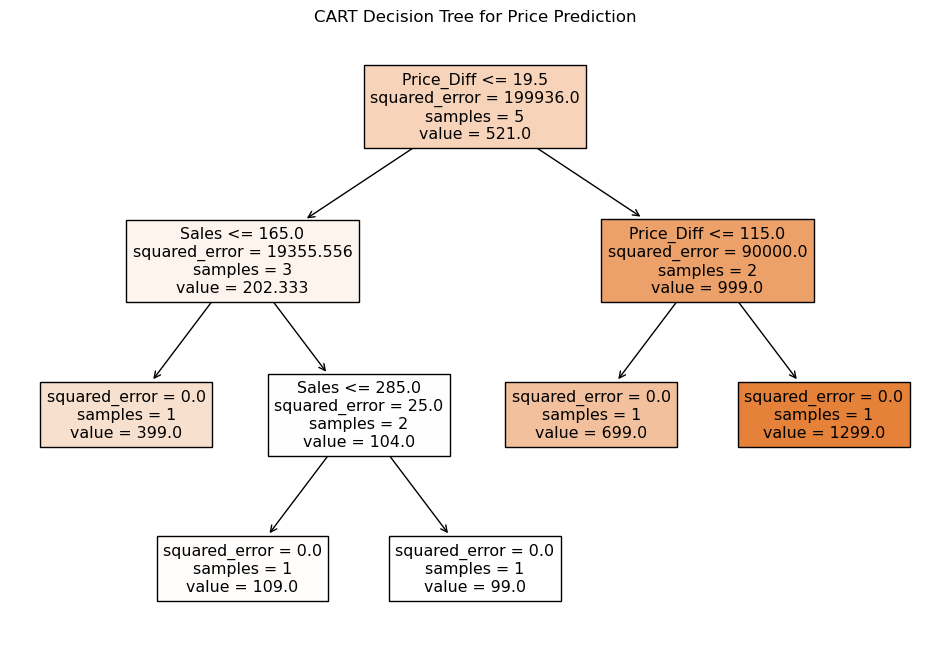

In [7]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns.tolist(), filled=True)
plt.title("CART Decision Tree for Price Prediction")
plt.show()
